## We have data!!!  Now what? 
### Point Estimators, Inference, choosing a population distribution, quantifying the estimators, and using them to make decisions. 

### Motivation:
#### In order to analyze problems involving uncertainty, we first need data. Then, we need to know the distribution and its parameters the data came from, so we can compute probabilities such as how likely the vaccine will be effective, traffic at an intersection, etc. 

### What we will cover:
- Parameter Estimation and Inference
    - MoM - Method of Moments
    - MLE - Maximum Likelihood
        - .fit() - MLE
        - Log rule for multipy vs. add
    - bootstrapping
<br><br>
- Quantifying the estimations:
    - Confidence Intervals
        - with bootstraping
        - for MoM and MLE I will cover in another post. 
- Math how to create alpha and beta values from E[X] and Var(X) for gamma
- Graphing examples
- KDE usage


### Some Techniques for Finding Point Estimators of Parameters
    - Method of Moments
    - Maximum Likelihood Method 
    - bootstrapping
    - Bayesian Method - I will cover in another post. 


#### A main point of statistical inference is to state how close $\bar X$ is to $\mu$; in some cases, they are not close at all.
    - Model produces data.
    - Model has unknown parameters (like $\mu$).
    - Data (like $\bar X$) reduce the uncertainty about the unknown parameters.


- When the population paramters are known along with the distribution, we can reason from f to x, in other words from the function to the data such as “If the experiment is like ..., then f will be ... (pmf/pdf), and ($X_1, X_2,...X_n$) will look like ...” or “$E[X]$ must be ...”, etc. 

- When parameters and distribution are not known, as is usually the case, we do the opposite. We reason from x to f, in other words from the data we extract and infer parameters and functions. We make statements such as “Since ($X_1, X_2,...X_n$) turned out to be ..., it seems that f is likely to be ...(pmf/pdf)”, or “xf(x) dx is likely to be around . . . ”, etc. 


- This is a basis for knowledge: learning about the world by observing it. 


- Said another way: (from "Introduction  to  Mathematical Statistics-7th Ed.-HOGG_CRAIG" pg. 203)

    - In a typical statistical problem, we have a random variable X of interest, but its pdf f(x) or pmf p(x) is not known. Our ignorance about f(x) or p(x) can roughly be classified in one of two ways:
        - 1. f(x) or p(x) is completely unknown.
        - 2. The form of f(x) or p(x) is known down to a parameter θ, where θ may be a vector.

        -Some examples are the following:
            - (a) X has an exponential distribution, Exp(θ), (3.3.2), where θ is unknown.
            - (b) X has a binomial distribution b(n,p), (3.1.2), where n is known but p is unknown.
            - (c) X has a gamma distribution Γ(α, β), (3.3.1), where both α and β are unknown.
            - (d) X has a normal distribution N(μ,σ2), (3.4.6), where both the mean μ and the variance σ2 of X are unknown.
<br><br>
            - We often denote this problem by saying that the random variable X has a density or mass function of the form f (x; θ) or p(x; θ), where θ ∈ Ω for a specified set Ω. For example, in (a) above, Ω = {θ | θ > 0}. We call θ a parameter of the distribution. Because θ is unknown, we want to estimate it.
<br><br>
            - When the sample is drawn, it is unlikely that the value of θ  is the true value of the parameter. In fact, if θ  has a continuous distribution, then Pθ (θ  = θ) = 0. What is needed is an estimate of the error of the estimation i.e., by how much did θ  miss θ? In this section, we embody this estimate of error in terms of a confidence interval,


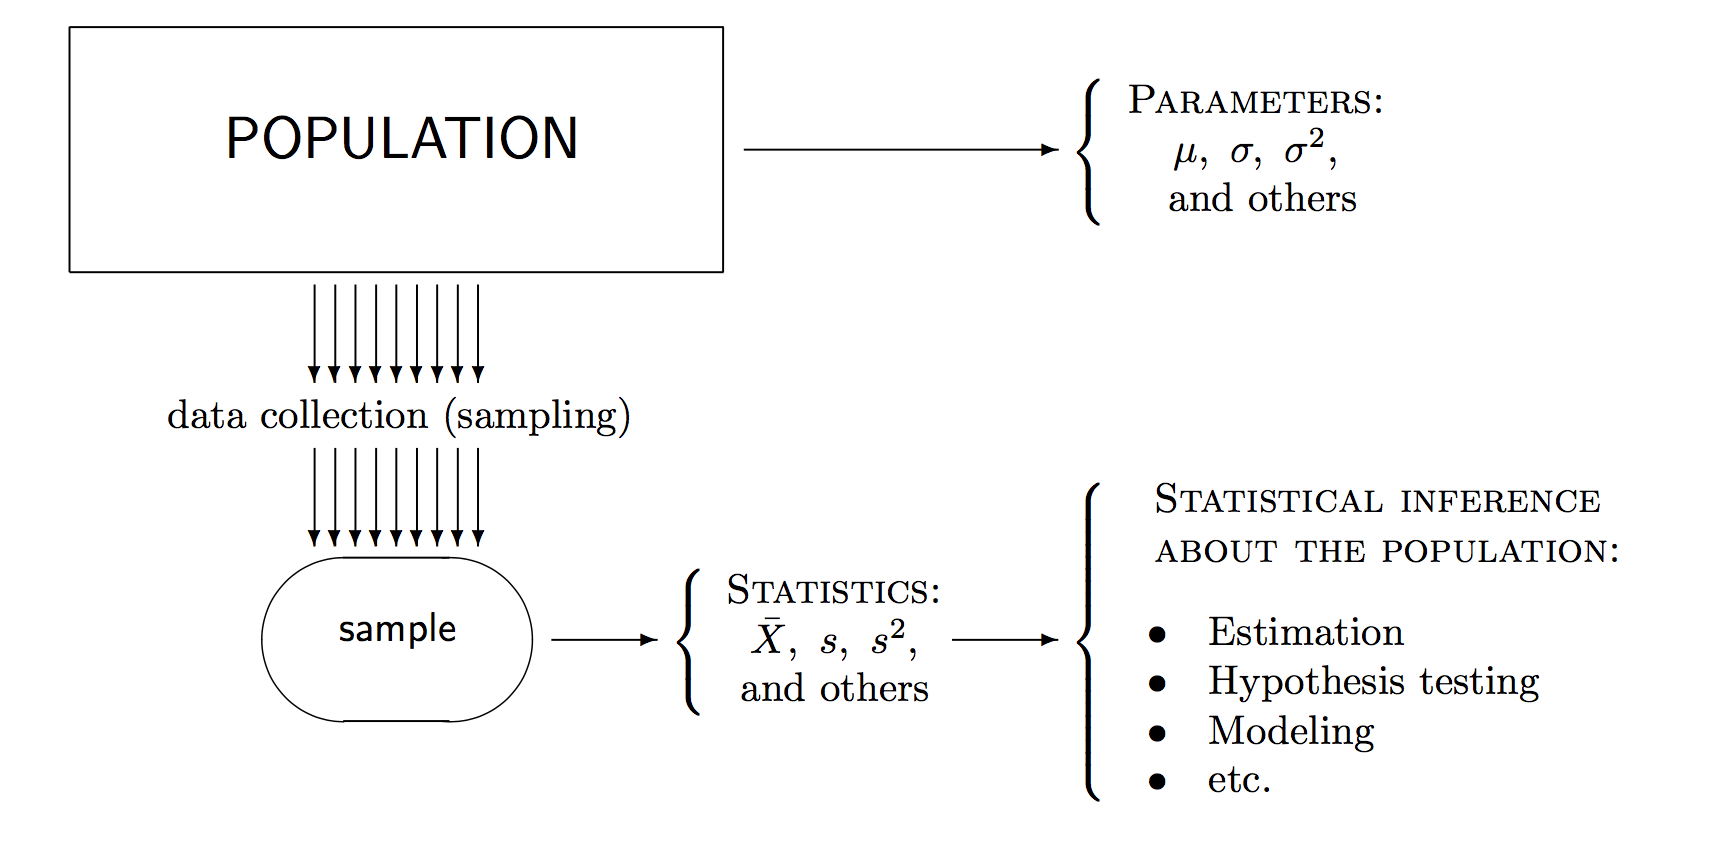
from: "Probability-and-Statistics-for-Computer-Scientists-Baron-Michael" pg. 209

### First up - MoM (Method of Moments)
- One of the oldest procedure
- generally, number of moment conditions equals number of parameters
<br><br>
- Why Use it?
    - Easy to compute
    - Will usually provide estimators when other techniques cannot, or when estimates are hard to obtain as in the case of gamma
    - Consistent

Suppose we have a sample from a normal distribution: $x_1, x_2, \cdots, x_n$

What's your best guess at which instance of normal distributions produced this sample?
$$ N(\bar x \rightarrow \hat\mu, s^2 \rightarrow \hat\sigma^2)$$ 

JUSTIFICATION:
- $\bar X$ is a random variable such that $E[S^2] = Var(x_i)$
    - $\bar x$ is an actualized outcome of $\bar X$ the random variable 
    - so $\bar x$ is a sample from the distribtuion of $\bar X$ which is centered on the distribution of the sample, who's variance is decreaseing as a function of $n$
    - remember that $Var[\bar X] = \frac{Var X_i}{n}$
    - $Var(X_i) = E[(X_i - E[X_i])^2]$

- $S^2$ is a random variable such that $E[S^2] = Var(X_i)$
    - $s^2$ is an actualized outcome of $S^2$ the random variable

Suppose we have a sample from a gamma distribution: $x_1, x_2, \cdots, x_n$

What's your best guess at which instance of gamma distributions produced this sample?
$$ Gamma(\frac{\bar x^2}{s^2} \rightarrow \hat\alpha, \frac{\bar x}{s^2} \rightarrow \hat\beta)$$ 

SCRATCH:

- $E[\bar X] = E[X_i] = \frac{\alpha}{\beta}$
- $Var[X_i] = \frac{\alpha}{\beta^2}$
- $\alpha = \frac{E[X_i]^2}{Var(X_i)}$ 
- $\beta =  \frac{E[X_i]}{Var(X_i)}$
- $\alpha = \frac{E[\bar X]^2}{Var(X_i)} \rightarrow \frac{\bar x^2}{s^2}$
- $\beta =  \frac{E[\bar X]}{Var(X_i)} \rightarrow \frac{\bar x}{s^2}$

using alpha $\alpha$, beta $\beta$ make the math expression nicer. but more work. 


JUSTIFICATION:
- $\bar X$ is a random variable such that $E[S^2] = Var(x_i)$
    - $\bar x$ is an actualized outcome of $\bar X$ the random variable 
    
    
- $S^2$ is a random variable such that $E[S^2] = Var(X_i)$
    - $s^2$ is an actualized outcome of $S^2$ the random variable
    
    

- Moment 1 is the sample mean and estimation for $\mu$
- Moment 2 is the sample variance estimatin for $\sigma^2$
- Moment 3 is skewness
- Moment 4 is kurtosis
<br><br>
- In practice, we only ever use the first 2 moments.

### no one uses this... they use instead *Maximum likelihood Estimation (MLE)

- Why not use it?
    - They are usually not the “best estimators” available. 
        - By best, we mean most efficient, i.e., achieving minimum MSE.
    - Sometimes it may be meaningless.
        - Suppose we observe 3,5,6,18 from a U(0,$\theta$)
        - Since E(X)= $\theta$ /2 
            - MME of $\theta$ is 2$\bar X$ = 2*(3+5+6+18)/4 =16
        - which is not acceptable, because we have already observed a value of 18.

## In Steps MLE

## let's choose between different distributions...
### This helps explain the intuition of MLE


- What we will try to do is based on the data we see, we will try to pick a distribution that data came from. 
    - We can rule out some distributions this way for example if the data contains real numbers then it is not a binomial or bernouli dist. since they require integers, yes, no, etc. If there are unique non-repeating numbers, then it could be continuous.



- you have the following sample: 1

    - discrete_uniform(-10, 10)
    - normal(1, sd=.25)
    - binomial(n=2, p=.5)
    - poisson(1)
    - gamma(a=2,scale=.5)
    
- what if we have these 2 samples: 1, 1.2

    - normal(1, sd=.25)
    - gamma(a=2,scale=.5)

- what if the sample drawn was only, 1.2

In [1]:
from scipy import stats
import numpy as np

In [3]:
data_points = [1.2, 1]

print(stats.norm.pdf(data_points, 1.2, .14)) # x, loc=mu, scale=sd
x_norm =stats.norm.pdf(data_points, 1.2, .14)
print (x_norm[0] * x_norm[1])

#pdf gives us the relavite frequency.
# gives the height of the point on the curve.
# 
print(stats.gamma.pdf(data_points, a=.2, scale=3))
y_gam = stats.gamma.pdf(data_points, a=.2, scale=3)
print(y_gam[0] * y_gam[1])
# we can compare 2 pdf's from different distributions and types of distributions.
#it automatically has an area of 1, and therefore can be compared. 

[ 2.84958772  1.02712759]
2.92689016744
[ 0.10130257  0.12529058]
0.0126922572208


#### Next, let's think about a vector of numbers which will lead us to our sample r.v.s that we then fit the model to.  
$f(X=1.2)$

$g([X_1, X_2] = [1.2, 1]) = g(X_1=1.2, X_2=1) \overset{\tiny i.i.d.}{=} f(X_1= 1.2) \times f(X_2=1)$

- such a vector could be made out of a list of i.i.d. random variables!
    - Example could be items a person bought in a grocery store
        - or categories and counts of those items from grocery store, protien, fruit, vege, etc. 


1. get a bunch of columns of features is probably not independent.
- vectors could represent an individual (and many measurements therein)
$$[X_1, Y_2,...Z_i]$$ 
    - a single multivariate sample
- Vectors could just be a set of random samples from the same distribution.
$$[X_1, X_2,...X_n]$$ 
    - repeated univariate measures put in a vector

standard statistical notation uses the $x_1=1.2$ notation rather then list notation. 
g is a mathematical function that operates on a multi-variate distribution, so it returns multiple values for a single sample like a person. area under the the function is still 1.

### Relative frequency of the vector
$$ g([X_1, X_2, \cdots, X_n] = [x_1, x_2, \cdots, x_n]) = g(X_1=x_1, X_2=x_2, \cdots, X_n=x_n) \overset{i.i.d.}{=} \prod_{i=1}^n f(X_i=x_i) $$

- we take the PDF in this example of each value in the vector and multiply them together.  

### MLE to model the distribution

- MLE - Try out every possible distribution instance (vary the parameters everywhere) and then just take the one that's the best. 

$$ \text {example below} $$

- what model is the right model: I don't care -- whichever seems to get the job done (maybe best, maybe not) 

- quantitative production versus qualitative production: how do we go about getting the answers. This is fair because the model produces the same result each time. vs. "diversity" /complex idiosyncratic/" in the moment"

- mathematical distributions are quite limited -- there aren't really that many... maybe 50 or less? 

- There are, however, many flexible non-parametric procedures (they probably have so-called "tuning parameter")

- you can have an "unlucky" sample not representative of the population: garbage in garbage out. 


In [6]:
samp = [1.2,1]
print (np.prod(stats.norm.pdf(samp, np.mean(samp), np.std(samp, ddof=1))))
# you will find no better normal distribution for this data 

# this is a very nice conflation of MoM (which is what the above -- i.e., plugin vals) 
# and MLE (because there is no other parameters that will make for a "better fitting"
# normal distribution)

4.8266176315


#### The above used the mean and standard deviation of the sample as the params for the center and spread, and since the values came right from the sample, no better fit could be made........
    - Except if we changed ddof to 0. That would increase relative frequency score. ddof = 0 is how the .fit() method selects the model params. 
    
#### Once we selected the model and parameters that gave us the maximum likelihood score with the pdf:
- Now we could do confidence intervals on the estimated parameters
- And this is how we would talk about "how good" our model choice is

-- all this is ONLY true for the normal distribution. for this context because we are only referring to normal in this example. 

- we can find the best instance of a family of distributions
- if they are not infinitately flexible
- some distributions, like non-parametric distributions, are for all practical purposes* infinitely flexible*
- so we'll never get a "best" in these classes of "flexible non-parametric distributions."


In [28]:
my_gamma_dist = stats.gamma(a=10, scale=.1)

In [29]:
print(my_gamma_dist.mean())
print (my_gamma_dist.var())

1.0
0.1


#### Next we'll use .fit() to let scipy.stats find the best mean and standard deviation for the sample.
- All we have to do is select which distribution we want to run the .fit() method on. 
- We can try several distributions, but we will find the "best fitting" one is probably not much better than its runner up.
    - so we don't have to try all of them. 

In [30]:
stats.norm.fit([1.2, 1]) # returns x-bar, sample standard dev. (divide var by n NOT n-1)
# this gives the model with the highest data likelihood. 
# but it uses an over optimistic variance/std dev. 
# because it uses variance with a ddof=0 aka. n rather than n-1

(1.1000000000000001, 0.099999999999999978)

In [34]:
# interestingly they don't use "n-1" in their sample standard dev. calculation
np.std(samp, ddof=1)

0.14142135623730948

In [32]:
print (np.prod(stats.norm.pdf(samp, np.mean(samp), np.std(samp, ddof=0))))
# using parameters from the .fit method of mean and std dev. this shows the results 
# of comparing the 2 normal models with different std. dev. the one that was best 
# used the more optimistic ddof=0 aka n=0

5.85498315243


### Important concept: *---Just Use the Model---*
#### - write up and diagram. 
- gather sample
- model the sample
- throw away the sample
- *Just use the model!!!* 
<br><br>
- Used in stats and in machine learning. 
    - Example: covered several days ago in relation to scope and how samples might be or might not be related. example was world population height and take a sample from usa and get a different lambda and sample from norway and get another lambda. but neither of those matter because we have the parent lambda. 

## Graphing how close sample using MLE .fit() to get the parameters resembles what the population looks like. 
### Also demonstrating how to use KDE graph

- Black line is the population distribution using the parameters the sample was created from.
- Blue line is the distribution of the sample using MLE to estimate the sample mean and sample variance.
- Red line, is the KDE. 
    - by adjusting the BW (*Bandwidth*) slider
        - make the width large to smooth out the curve.
        - narrow bandwitdth overfits the data, so we can see how the underlying data fluctuates.
        - A great tool for when we use bokeh because we can dynamically adjust

In [2]:
import numpy as np
from scipy import stats
import math

from bokeh.io import output_notebook, show, output_file, push_notebook
from bokeh.plotting import figure


# For dynamic interactive data as a dictionary
from bokeh.models import ColumnDataSource

# Widget to accept inputs to modify the graphs. 
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Dropdown, Slider
from ipywidgets import interact
output_notebook()

Loading BokehJS ...

In [4]:
from scipy.stats import gaussian_kde

In [8]:
bw=.2
n=30
# get a sample, any sample. we don't know mu or spread.
samp = stats.norm.rvs(size=n)

grid = np.linspace(-2.5, 2.5, 1000)
kde= gaussian_kde(samp, bw_method=bw).evaluate(grid)

p = figure(title="Model Inference", plot_height=300, plot_width=600, y_range=[0,1], x_range=(-2.5, 2.5))

r = p.line(grid, kde, color='red', line_width=3)
t = p.line(grid, stats.norm.pdf(grid), color='black', line_width=3)

# use floc=0 if e.g. we're fitting a gamma which has an extra "loc" parameter 
# which is not alpha (a) and is not beta (scale)
# fit the data to the model to find the optimal mu and spread of our sample.
mu, sig = stats.norm.fit(samp)
#plug in the .fit() mu and spread of the sample as parameters to -
# the PDF to get the relative frequency points for each sample r.v. 
f = p.line(grid, stats.norm.pdf(grid, loc=mu, scale=sig), color='blue', line_width=3)

def update(n=30, bw=.2, resamp='no'):
    if resamp=='yes':
        new_samp = stats.norm.rvs(size=n)
        mu, sig = stats.norm.fit(new_samp)
        f.data_source.data['y'] = stats.norm.pdf(grid, loc=mu, scale=sig)        
        kde= gaussian_kde(new_samp, bw_method=bw).evaluate(grid)
        r.data_source.data['y'] = kde
    else:
        kde= gaussian_kde(samp, bw_method=bw).evaluate(grid)
        r.data_source.data['y'] = kde
    push_notebook()
       

In [6]:
x = show(p, notebook_handle=True)

In [15]:
x = interact(update, n=(2, 1000,1), bw=(.01, 3, .01), resamp=['no', 'yes'])

### This is how we estimate:
#### Process inside the pdf that creates the MLE. When using .fit() ddof=0 so the sample is divided by n rather than n-1.

$
\begin{align}
Var(\bar X) =& \frac{Var(X)}{n}\\ 
\widehat{Var(\bar X)} \frac{s^2}{n} \\
=& \frac{\frac{\sum_{i=1}^n(x_i-\bar x)^2}{n-1}}{n}
\end{align}
$

### Next: Demonstrating how to get logpdf() and sum vs. pdf() and multiply. 
#### Results are the same. 
- Except: when sample size grows, multiplying each pdf together fails.
- multipylying real numbers less than 1 get so small they effectively reach 0, and the computer no longer has the capability to keep track of such small numbers. 
- so, when we go to take the log of 0, we get "RuntimeWarning: divide by zero encountered in log"

#### Therefore, use the logpdf() method and add them up.

In [14]:
# stats.norm.fit(samp)
# assume sd = 1
n=30
samp = stats.norm.rvs(size=n)

# print (samp)
# print (stats.norm.pdf(samp, loc=0, scale=1))
# print (np.prod(stats.norm.pdf(samp, loc=0, scale=1)))
## switching to the log scale now we do the following:

prod_pdf = np.prod(stats.norm.pdf(samp, loc=0, scale=1))
print(np.log(prod_pdf))
print(np.sum(stats.norm.logpdf(samp, loc=0, scale=1)))

-40.0441053299
-40.0441053299


In [11]:
# x-axis of the function (i.e., the support of the fnction)
# mus = np.linspace(-2.5, 2.5, 1000)
# print(mus)

# y-axis of the function (i.e., the likelihood== 
# "relative frequency at a specific choice of the parameter/distributional instance")

# get_log_likelihood function()
def get_ll(samp, mus= np.linspace(-2.5, 2.5, 1000)):
    # mus are x-axis/support
    
    log_likelihoods = mus.copy()
    for idx, mu in enumerate(mus):
        log_likelihoods[idx] = np.sum(stats.norm.logpdf(samp, loc=mu, scale=1))
#     print (log_likelihoods)    
    
    return(mus, log_likelihoods)

### Log rule for multipy vs. add used above:


$$
\begin{align}
\log(\prod^n_{i=1}pdf(a_i)) \longrightarrow \sum^n_{i=1}\log(pdf(a_i)) 
\end{align}
$$

- $a_i$ is the relative frequency element.
- product is the relative requency of i.i.d. elemental vector.
- allows us to have computational/computer precision when we log and add whereas when we multiply really small numbers together, they become so small it becomes hard to keep precise. So we take the log and add.
- despite the transition from *relative frequncy* to LOG *relative frequency*
- Order is preserved: the best model is relative frequency space IS STILL the best model in LOG frequency space.
- because the "log is monotonic"



### Plot the log_likelihoods:
#### Calculate the MLE for each mu across 1000 point relative frequencies. Plot each MLE. The peak of the curve, since this is logpdf() rather than trough for multiply pdf(), is the best choice of mu for this sample set.  

In [15]:
n=30
samp = stats.norm.rvs(size=n)
x, y =get_ll(samp)


p = figure(title="mu that maximizes the Log Likelihood of seeing the vector", 
           plot_height=300, plot_width=600, y_range=[0,1], x_range=(-2.5, 2.5), 
          x_axis_label="hat mu", y_axis_label="log_likelihood")
# print (y)
p.y_range.start = np.min(y)
p.y_range.end = np.max(y)
r = p.line(x, y, color='red', line_width=3)

print(np.min(y), np.max(y))
print(np.min(x), np.max(x))

def update(n=30):
    samp = stats.norm.rvs(size=n)
    x, y= get_ll(samp)
    p.y_range.start = np.min(y)
    p.y_range.end = np.max(y)
    
    r.data_source.data['y'] = y
    r.data_source.data['x'] = x

    push_notebook()

-154.20230641 -38.3416661134
-2.5 2.5


In [16]:
x=show(p, notebook_handle=True)

In [17]:
x=interact(update, n=(1,1000))

## 12/8/2017 MLE (Maximum Likelihood Estimation) Wrap-up

### Nomenclature
- random variables instantiated into outcomes
- Random variables are attached to a distribution == "Random variable X is distributed as $<$ some distribution$>$
- A particular instance (or instantiation) of a family of a distributions (e.g., "normal distributions") is one of those distributions where the parameters have been specified
- Parametric (def. via stats): a model that can be indexed into by parameters. (a fixed set of indices by which never change by which to identify the specific distributional instance. ) 


### MLE Summary

- Given a distribution family, finds the instance which makes the observed data as likely as possible (as judged by the relative frequency)
    - pick an instance of a distributional family which is the closest to approximating the distribution to the data.  
    - if empirical distribution of data closely matches an instance of a distributional family, then the likelihood of the data under that instance is height: conversely, if an instance of a distribution does not well approximate an empirical distribution of data, then the likelihood of that data under that specific family instance will be low. 
    - this means we treat/convert the sample to an ePMF, i.e., we actually say the data/sample *is a distribution* -- therefore, we know *exactly* the true distribution of the sample, which leads to the whole "divide by n instead of n-1" thing. 
- MLE is an activity that's defined over *one class* of distributions (one family of distributions), however, MLE returns the distributional instance inferences (from that family) for which the data/sample has the highest likelihood of occuring. 
    - therefore, you could do the MLE exercise on multiple families of distributions... each one give us the instance (from that family) which makes the data most likely 
        - Q: which between all these instances makes the data most likely? 
            - we are now competing models. 
        - This implies that any model is a tool - an end to a means. and that "means" is a being a good "fit"/model for the data. 
- "The Best" model as judged by MLE is a question of the maximum of the *Likelihood*.
    - the *likelihood* is a very important/central object in MLE analysis
    
    
- Garbage in garbage out where FOR US "garbage" means insufficient information.     
    - this is for us the issue of overfitting
    - we need to somehow be able to assess if we have sufficient information/data to make the claims we're making [i.e., our model fit is useful]
    - not overfit the model on idiosycratic characteristics of the sample -- this is *INCREDIBILY* easy to do with the astoundingly flexible and power and complex models that we have available. 
<br><br>
    - *Sensitivity analysis* is a way to bolster conclusions: if the material/qualitative conclusions change depending on which methodology is applied, then our "results" are "sensitive" to our (arbitrary?) modeling choices. 

## Bootstrapping:


- bootstraping is the radical idea that the sample is a good representation of the population from which it came. 
- this takes the sample to the distribution rather than MOM and MLE where we pull/bring the  sample over to match the data.
- THEREFORE, let us pretend that the sample IS the population 
    - don't do full MLE/MoM -- just use the impirical PMF (ePMF) itself as the distribution
- Done!
- No need to model -- just sample repeatedly from the "distribution" (i.e., "the sample) in order to understand the characteristics of the samples from said distribution

- Starts with the assumption that the 1st sample drawn from the population is not an Unlucky sample for the parameter we care about. for example if we want to know the mean of the population then we assume about 30 is sufficient and good enough. 

- for an estimator we care about, bootstrapping helps us quantify the variance around it. 

#### We calculate the uncertainty of our test statistic estimate by sampling multiple times, and calculating the np.percentile() around it. 

### Example using gamma as the sample source. 
#### the following shows the manual steps and overall process. We will put this into a more robust loop next.

In [20]:
import scipy.stats as stats
from random import choices

In [21]:
# calculate the population standard deviation to compare with bootstrap.
stats.gamma.std(a=2, scale=.4)

0.56568542494923812

In [23]:
# np.std(samp, ddof=1)

In [24]:
# each sample size will have n i.i.d. r.v.
n=100
samp = stats.gamma.rvs(size=n, a=2, scale=.4)

# how many times sample will be sampled from to create new samples is n_bs
n_bs = 5000
bs_std = np.zeros(n_bs)

for b in range(n_bs):
    #1. bootstrapped samples are sampled with replacement because i.i.d and treating as population
    #2. size of boot sample is size of original sample size. 
    bs_samp = choices(samp, k=n)
    
    # the following line calculates the standard deviation and assigns to an array. 
    bs_std[b] = np.std(bs_samp, ddof=1)
    

In [25]:
np.percentile(bs_std, [2.5, 97.5]) # ~confidence interval on the variance. 

array([ 0.4340351 ,  0.66449676])

### * More robust: Bootstrap gamma and compare standard deviation with population std().*

In [80]:
### * Bootstrap gamma and compare standard deviation.*

n=200
#calculate the std() of population and assign to variable for comparison.
truth = stats.gamma.std(a=2, scale=.4)
#counter to keep track of how frequent the bootstrapped sample std missed the 
missed = 0

# how many times sample will be sampled from to create new samples is n_bs
n_bs = 1000
bs_std = np.zeros(n_bs)

#sim_reps is number of times we will repeat entire experiment using a new sample 
sim_reps = 1000
for s in range(sim_reps):
    #print the status every 100 experiments.
    if (s%1000==0):
        print(s, missed)
    
    samp = stats.gamma.rvs(size=n, a=2, scale=.4)
    #n_bs is how many times I will bootstrap sample from my primary sample of n r.v.
    for b in range(n_bs):
        bs_samp = choices(samp, k=n)
        bs_std[b] = np.std(bs_samp, ddof=1)
    
    ans = np.percentile(bs_std, [2.5, 97.5])
   
    if ((truth < ans[0]) or (truth> ans[1])):
        missed+=1
            
print(1-missed/sim_reps)

0 0
0.911


### Now let's see the same process to compare sample mean to population mean.
### Bootstrap gamma and compare means

In [64]:
### * Bootstrap gamma and compare sample mean to population mean.*

n=100
#calculate the mean() of population and assign to variable for comparison.
truth = stats.gamma.mean(a=2, scale=.4)
print(truth)
#counter to keep track of how frequent the bootstrapped sample std missed the 
missed = 0

# how many times sample will be sampled from to create new samples is n_bs
n_bs = 5000
bs_std = np.zeros(n_bs)

#sim_reps is number of times we will repeat entire experiment using a new sample 
sim_reps = 1000
for s in range(sim_reps):
    #print the status every 100 experiments.
    if (s%100==0):
        print(s)
    samp = stats.gamma.rvs(size=n, a=2, scale=.4)
    #n_bs is how many times I will bootstrap sample from my primary sample of n r.v.
    for b in range(n_bs):
        bs_samp = choices(samp, k=n)
        bs_std[b] = np.mean(bs_samp)
    
    ans = np.percentile(bs_std, [2.5, 97.5])
    if ((truth < ans[0]) or (truth> ans[1])):
        missed+=1
            
print(1-missed/sim_reps)


0.8
0
100
200
300
400
500
600
700
800
900
0.9410000000000001


### Difference between standard deviation and mean bootstraps.

- The mean is more accurate to bootstrap with the gamma than the standard deviation for similar run sizes.
- even when the number of bootstrap samples collected is increased the standard deviation does not perform as well. 
- std dev. ranges from .84 to .92 accuracy multiple tries with various sizes of bootstraps and overall resamples. 
- mean does far better at around .94 when .95 range was calculated. 


### Bootstrapping Summary

0. One has a sample, and is interested in a statistic $Stat_{sample}$constructed from said sample
    - this might be meant to estimate $E[x], Var[X]$ or something else!
1. It is of some interest to have an idea of the uncertainty associated with this estimate (i.e, the statistic in questions)...
2. but a number of things can happen(!)
    - a. this statisic may not be $\bar x$! (or have any CLT based confidence interval results, e.g., $r^2$ or $s^2$
    - b. we may have such results, but they may be asymptotic (relying on a large sample size to believe the assumption underlying the interval construction process
    - in these cases we *do not* have a viable path forward for constructing a confidence interval ( to characterize the uncertainty of our estimated statistic
    
3. So, what we can do is appeal to the "bootstrapping" (non-parametric/distribution assumption free) procedure to construct a "bootstrapped confidence interval."

The bootstrapping procedure is as follows:
- assume a "representative" sample (the sample will never be great representative of the population, but the sample can be a "good sample" from the population, with respect to the statistic to be evaluated upon it)
- treat sample as a populatin (which we can arbitrarily resample from) 
    - if we assumed the sample WAS "the population, then we could simply calculate, that characteristic, e.g., $Var(X)$ we'd just calculate $\sum_{i=1}^N(x_i-\bar x)^2 \frac{1}{N}$ based on that sample population
    - but this is not quite enough... it does not supply any uncertainty notion -- it's just a "popluation" characteristic. 
    
### the point of the bootstrapping procedure is to estimate the uncertainty of the statistic -- not just the statistic estimate itself

So what we do is" 
0. resample $B$ bootstrapped samples from the sample
    - $B$ (number of bootstrapped samples) is arbitrarily chosen.
        - larger $B$ will make for a subsequently "more precise" estimation...
    - the size of each bootstrapped sample should be the same size of the $B$ sample
1. recalculate $stat_{sample}$ for each of the $B$ samples bootstrapped from the original samplepopulation.
    - this gives us a "population" of "bootstrapped" $stat_{sample}$'s"
        - this "populatin ismore accurately known if $B$ gets larger...
    - finally, we make e.g., "95% bootstrapped confidence interval" 
        - the 95% confidence guarantee is not "mathematical" in nature... it is empirical and it is what it is. 
        - so we need to actually check and validate the nominal/presumptive/assumed confidence level. 
        - *actual operating characteristics of bootstrapped confidence intervals subject to fallacy /confradiction*
        - e.g., above, a 95% bootstrapped confidence interval actually gave a more like ~80% "confidence", i.e., only 80%of the generated "95% bootstrapped confidence intervals" actually captured the true populatin variance. 
             - this was shown for $<$*specific simulation experiment*$>$ setting
    

### Possible Next Steps:
- Graph out the bootstrap results.
    - add sliders to change parameters to optimize results. 
- diagram the bootstrap process for easy understanding. 